In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import pickle
from scipy.optimize import minimize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from Ising_integrals import *
import routines
from known_formulas import *

In [22]:
def linear(x, a,b):
    return a * x + b

## State Following

In [23]:
p = 3
n_points_m = 500
n_points_less_T = 4
n_points_T = 4
n_points_more_T = 4

T_kauz, T_dyn = get_Tk_Td(p)

Teqs = np.hstack(
    (
        (T_kauz - (T_dyn - T_kauz) / (n_points_T) * np.arange(1, n_points_less_T + 1))[::-1],
        np.linspace(T_kauz, T_dyn, n_points_T + 1),
        T_dyn + (T_dyn - T_kauz) / (n_points_T) * np.arange(1, n_points_more_T + 1),
    )
)
Tdiff = T_dyn - T_kauz
J0 = 0.5 / T_kauz

m2i = 0.9
q2i = 0.9

In [ ]:
file_path = f"./dataIsi/rs_p{p:d}.pkl"
if False:
    print("Data is already saved.")

    with open(file_path, "rb") as f:
        tmp = pickle.load(f)
        data = tmp["data"]
        ms = tmp["ms"]

    print("Data is loaded.")
else:
    print("Data is not saved.")

    ms = np.linspace(0.0, 0.9, n_points_m)
    data = routines.observables((len(Teqs), n_points_m))
    q_old = 0.9

    m_2 = m2i
    q_2 = q2i
    blend = 0.95

    mss = np.empty(len(Teqs))
    qss = np.empty(len(Teqs))
    fss = np.empty(len(Teqs))
    ess = np.empty(len(Teqs))
    sss = np.empty(len(Teqs))
    Hes = np.empty(len(Teqs))

    for jdx, T in enumerate(tqdm(Teqs, desc="RS")):
        for idx, m in enumerate(tqdm(ms, desc="m", leave=False)):
            h, q = fixed_points_h_q_T(m, T, p, J0, blend=blend, q_init=q_old)

            data["q"][jdx, idx] = q
            # data['h'][jdx, idx] = h
            data["T"][jdx, idx] = T
            data["f"][jdx, idx] = f_FP_T(m, q, h, p, T, J0)
            # data["s"][jdx, idx] = s_FP_J0(q, m, p, 1 / T, J0)
            # data["e"][jdx, idx] = e_J0(q, m, p, 1 / T, J0)
            # data["He"][jdx, idx] = Hes_eig_J0(q, m, p, 1 / T, J0)
            # data['dAT'][jdx, idx] = dAT_condition(
            #    q, m, h, beta_q_e(q, m, e, p,h), beta_q_e(q, m, e, p,h) / 2, p
            # )
            q_old = q

        # err = 1

        # while err > 1e-7:
        #     m_new = compute_m_FP_T(m_2, q_2, p, 1 / T, J0)
        #     q_new = compute_q_FP_T(m_2, q_2, p, 1 / T)

        #     err = max(abs(q_new - q_2), abs(m_new - m_2))
        #     m_2 = blend * m_2 + (1 - blend) * m_new
        #     q_2 = blend * q_2 + (1 - blend) * q_new
        #     print(T, m_2, q_2, err)

        # mss[jdx] = m_2
        # qss[jdx] = q_2
        # ess[jdx] = e_J0(q_2, m_2, p, 1/T, J0)
        # fss[jdx] = f_FP_J0(q_2, m_2, p, 1/T, J0)
        # sss[jdx] = s_FP_J0(q_2, m_2, p, 1/T, J0)
        # Hes[jdx] = Hes_eig_J0(q_2, m_2, p, 1/T, J0)

    with open(f"./dataSphJ0/rs_p{p:d}.pkl", "wb") as f:
        pickle.dump({"data": data, "ms": ms}, f)

    print("Data is saved.")

Data is not saved.


RS:   0%|          | 0/13 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

m:   0%|          | 0/500 [00:00<?, ?it/s]

Data is saved.


In [ ]:
file_path = f"./dataIsi/rs_p{p:d}.pkl"
if False:
    print("Data is already saved.")

    with open(file_path, "rb") as f:
        tmp = pickle.load(f)
        data = tmp["data"]
        ms = tmp["ms"]

    print("Data is loaded.")
else:
    print("Data is not saved.")

    ms = np.linspace(0.0, 0.9, n_points_m)
    data = routines.observables((len(Teqs), n_points_m))
    q_old = 0.9

    m_2 = m2i
    q_2 = q2i
    blend = 0.95

    mss = np.empty(len(Teqs))
    qss = np.empty(len(Teqs))
    fss = np.empty(len(Teqs))
    ess = np.empty(len(Teqs))
    sss = np.empty(len(Teqs))
    Hes = np.empty(len(Teqs))

    for jdx, T in enumerate(tqdm(Teqs, desc="RS")):
        err = 1

        while err > 1e-7:
            m_new = compute_m_FP_T(m_2, q_2, p, 1 / T, J0)
            # q_new = compute_q_FP_T(m_2, q_2, p, 1 / T)
            h_new, q_new = fixed_points_h_q_T(m_2, T, p, J0, blend=blend, q_init=q_2)

            err = max(abs(q_new - q_2), abs(m_new - m_2))
            m_2 = blend * m_2 + (1 - blend) * m_new
            q_2 = blend * q_2 + (1 - blend) * q_new
            print(T, m_2, q_2, err)

        mss[jdx] = m_2
        qss[jdx] = q_2
        # ess[jdx] = e_J0(q_2, m_2, p, 1/T, J0)
        fss[jdx] = f_FP_T(q_2, m_2, h, p, T, J0)
        # sss[jdx] = s_FP_J0(q_2, m_2, p, 1/T, J0)
        # Hes[jdx] = Hes_eig_J0(q_2, m_2, p, 1/T, J0)

    with open(f"./dataSphJ0/rs_p{p:d}.pkl", "wb") as f:
        pickle.dump({"data": data, "ms": ms}, f)

    print("Data is saved.")

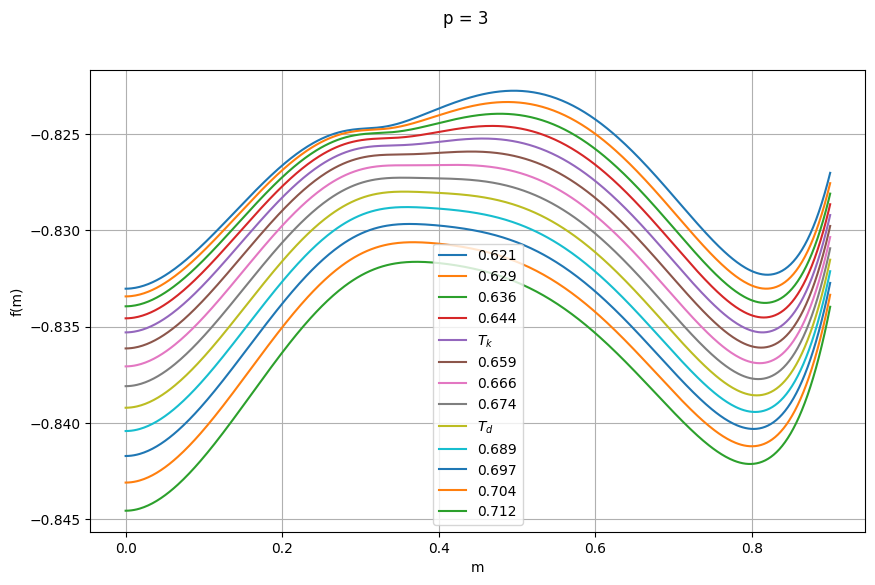

In [26]:
plt.figure(figsize=(10,6))
plt.suptitle(f"p = {p:d}")
for i, T in enumerate(Teqs):
    legend_name = routines.legend_name_Tk_Td_T(T, T_kauz, T_dyn)

    plt.plot(ms, data['f'][i], label=legend_name, color=f'C{i}')
    # plt.scatter(mss[i], fss[i], c=f'C{i}', s=20)

plt.xlabel('m')
plt.ylabel(r'f(m)')
#plt.xlim(0, 0.8)
#plt.ylim(-1.4, -1.2)
plt.legend()
plt.grid()
